In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'IPL2016.csv').iloc[:,1:3]

In [3]:
df.sample(5)

,overall_sr,won
9,91.176471,0
12,217.307692,1
11,163.414634,1
1,165.432099,0
5,124.489796,0


In [4]:
X = df['overall_sr']
y = df['won']

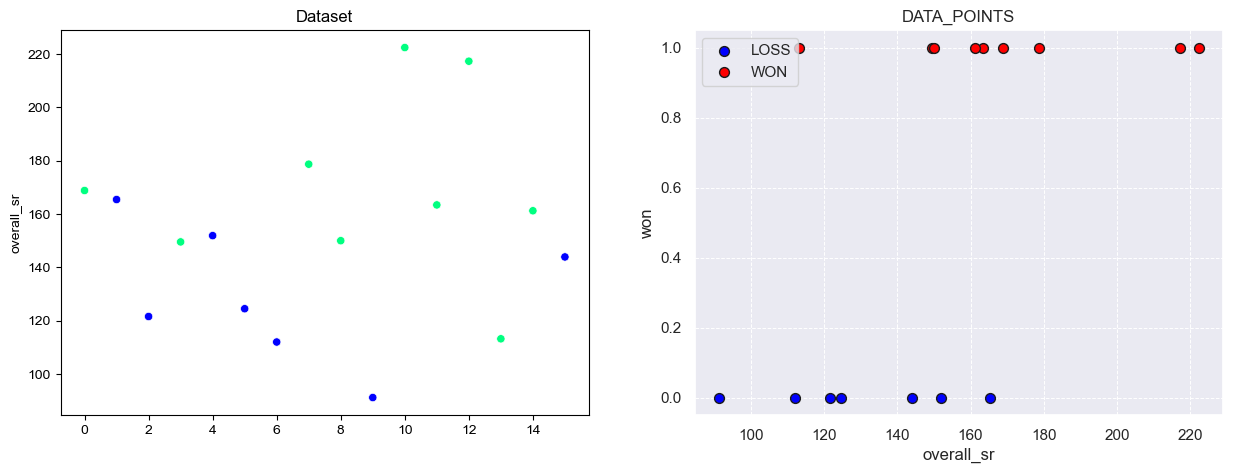

In [5]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Dataset')
sns.set(style='darkgrid')
sns.scatterplot(X,c = y,cmap = 'winter')
plt.subplot(1,2,2)
plt.title('DATA_POINTS')
plt.xlabel('overall_sr')
plt.ylabel('won')
plt.scatter(X[y == 0], y[y == 0], c='blue', s=50, edgecolor='k', label='LOSS')
plt.scatter(X[y == 1], y[y == 1], c='red', s=50, edgecolor='k', label='WON')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.7)


In [6]:
from sklearn.metrics import accuracy_score

In [7]:
def sigmoid( z):
        return 1 / (1 + np.exp(-z))

In [225]:

class Logistic_model:
    def __init__(self, learning_rate=0.01, epochs=3500):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = 0  # Initialize coefficient as a scalar
        self.intercept_ = 0  # Initialize intercept as a scalar

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.accuracy = []
        N = X.shape[0]
        X = (X - np.min(X))/(np.max(X) - np.min(X))
        for _ in range(self.epochs):
            z = self.coef_ * X + self.intercept_
            # print(z)
            y_hat = self.sigmoid(z)
            
            coef_der = np.dot(np.transpose(X), (y_hat.flatten() - y)) / N
            # print(y_hat.flatten())
            intercept_der = np.sum(y_hat.flatten() - y) / N
            self.coef_ -= self.learning_rate * coef_der
            self.intercept_ -= self.learning_rate * intercept_der
            z = self.coef_ * X + self.intercept_
            pred = self.sigmoid(z) >= 0.5
            pred = pred.astype(int)
            (self.accuracy).append(accuracy_score(y,pred))
    def predict(self, X):
        X = (X - np.min(X))/(np.max(X) - np.min(X))
        z = self.coef_ * X + self.intercept_
        return (self.sigmoid(z) >= 0.5).astype(int)
    

In [226]:
X = np.array(X).reshape(-1,1)
y = np.array(y)

In [227]:
reg = Logistic_model()
reg.fit(X,y)

In [228]:
reg.coef_,reg.intercept_

(array([1.77880938]), -0.48478038287664893)

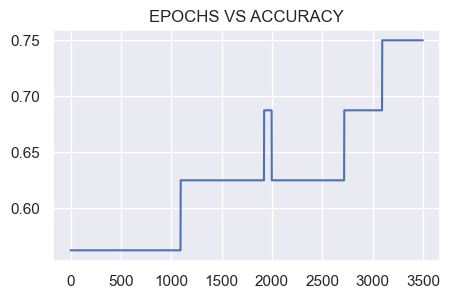

In [230]:
plt.figure(figsize=(5,3))
plt.title('EPOCHS VS ACCURACY')
plt.plot(reg.accuracy)

In [232]:
y_pred = reg.predict(X)

In [233]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.75

# PROBABILITY CALCULATION FUNCTION:

LETS TAKE AN ARBITARY LINE Y = -3*x + 5

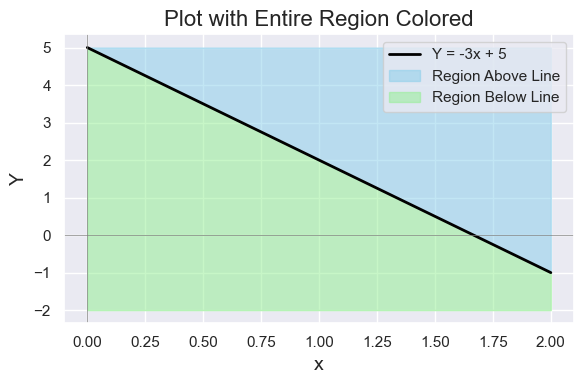

In [234]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)
Y = -3 * x + 5

plt.figure(figsize=(6, 4))


plt.plot(x, Y, color='black', lw=2, label='Y = -3x + 5')

plt.fill_between(x, Y, y2=5, where=(Y < 5), interpolate=True, color='skyblue', alpha=0.5, label='Region Above Line')

plt.fill_between(x, Y, y2=-2, where=(Y >= -2), interpolate=True, color='lightgreen', alpha=0.5, label='Region Below Line')

plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.xlabel('x', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Plot with Entire Region Colored', fontsize=16)
plt.legend()
# plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



### Concept

In the blue region, any point has a positive value for `-3*x + 5`. Let's denote this value as `P`, which satisfies `P > 0`. If you substitute that value into the sigmoid function (`f = 1 / (1 + e^-P)`), then `f > 0.5` because `P > 0`. Therefore, the larger the distance between the point and the line in the blue region, the larger the value of `P` will be, and hence the probability will tend towards 1.
similarly we can conclude for Green region also

In [235]:
def probability_won(num):
        num = (num - np.min(X))/(np.max(X) - np.min(X))
        z = reg.coef_ * num + reg.intercept_
        return 1 / (1 + np.exp(-z))

In [236]:
min = np.min(X)
max = np.max(X)

In [237]:
def normalization(X):
 return (X - min)/(max - min)

In [238]:
data = np.linspace(1,300,100)

In [239]:
def point_finder(data):
 for i,k in enumerate(probability_won(data)):
    if k<0.52 and k>=0.50:
        return i

In [240]:
num = point_finder(data)


Text(5, 1, 'Value of X for which probability is 0.5 is = 127.84848484848486')

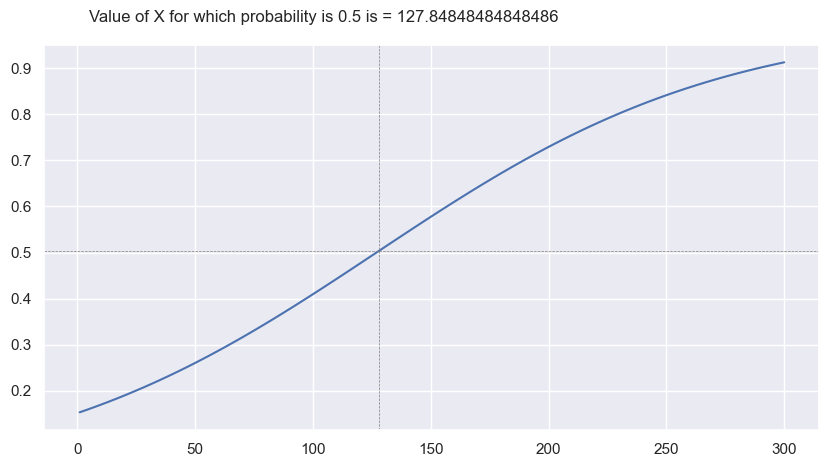

In [241]:
plt.figure(figsize=(10,5))
plt.plot(data,probability_won(data))
plt.axhline(probability_won(data)[num], color='grey', linestyle='--', linewidth=0.5)
plt.axvline(data[num], color='grey', linestyle='--', linewidth=0.5)
plt.text(5,1,'Value of X for which probability is 0.5 is = '+str(data[num]))

<Axes: title={'center': 'CLASSIFICATION_LINE'}, xlabel='Strike_rate'>

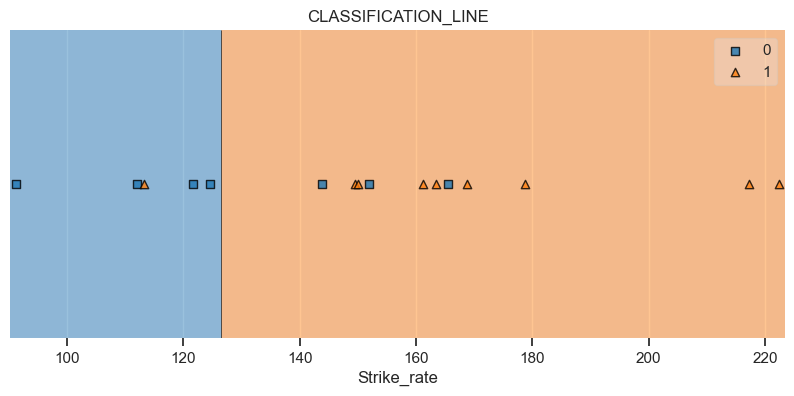

In [242]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,4))
plt.title('CLASSIFICATION_LINE')
plt.xlabel('Strike_rate')
plot_decision_regions(X,y,clf = reg)

# TO find the Probability of RCB Winning:

In [243]:
def calculate_won_prob(strike_rate):
    return f'probability of Winning of RCB is {probability_won(strike_rate)[0]}'

In [244]:
calculate_won_prob(150)

'probability of Winning of RCB is 0.5774768805234289'